In [1]:
import numpy as np
import pandas as pd
import sympy as sp

In [2]:
ls ./data/lognormal_sample.xlsx

./data/lognormal_sample.xlsx


In [3]:
tab = pd.read_excel('./data/lognormal_sample.xlsx')

In [4]:
tab


,Sample
0,46
1,52
2,79
3,42
4,7
...,...
995,9
996,70
997,47
998,70


In [5]:
x = sp.Symbol('x')
d = sp.Symbol('d')


In [6]:
r=1
c=10
p=12

In [7]:
profit = p*sp.Piecewise((x,x<d),(d,True)) + r*sp.Piecewise((0, x<d), (x-d,True)) - c*x

In [8]:
profit

-10*x + Piecewise((0, d > x), (-d + x, True)) + 12*Piecewise((x, d > x), (d, True))

In [9]:
x0 = 81

profitx = profit.subs({x:x0})


In [10]:
profitx

Piecewise((0, d > 81), (81 - d, True)) + 12*Piecewise((81, d > 81), (d, True)) - 810

In [11]:
tab['Sample']

0      46
1      52
2      79
3      42
4       7
       ..
995     9
996    70
997    47
998    70
999    50
Name: Sample, Length: 1000, dtype: int64

In [12]:
tab['profit'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))

In [13]:
tab

,Sample,profit
0,46,-223.0
1,52,-157.0
2,79,140.0
3,42,-267.0
4,7,-652.0
...,...,...
995,9,-630.0
996,70,41.0
997,47,-212.0
998,70,41.0


<Axes: ylabel='Frequency'>

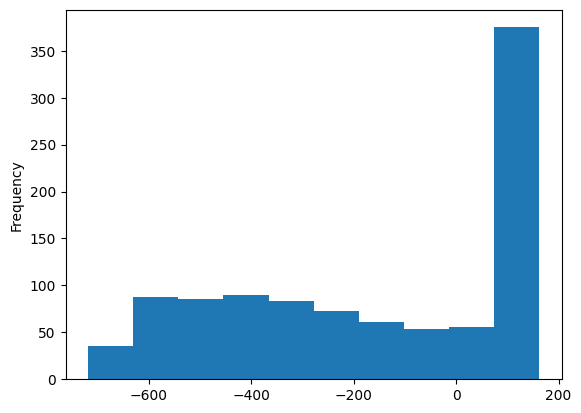

In [14]:
tab['profit'].plot(kind='hist')

In [15]:
tab['profit']

0     -223.0
1     -157.0
2      140.0
3     -267.0
4     -652.0
       ...  
995   -630.0
996     41.0
997   -212.0
998     41.0
999   -179.0
Name: profit, Length: 1000, dtype: float64

In [16]:
x1=2
x2=100
profitx = profit.subs({x:x1})

tab['profit1'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))
profitx = profit.subs({x:x2})
tab['profit2'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))


<Axes: ylabel='Density'>

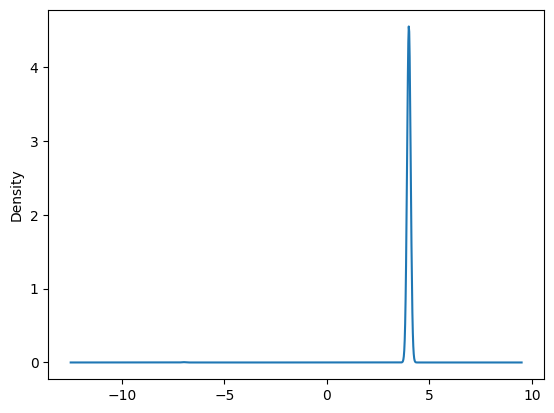

In [17]:
tab['profit1'].plot(kind='density')

<Axes: ylabel='Density'>

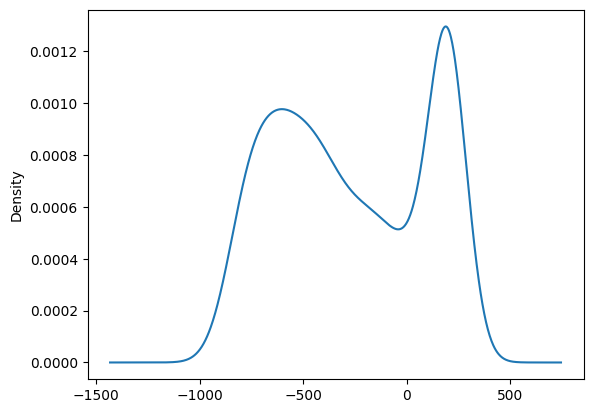

In [18]:
tab['profit2'].plot(kind='density')

In [19]:
tab['profit1'].mean()

3.989

In [20]:
tab['profit2'].mean()

-264.134

In [21]:
tab['profit1'].quantile(0.8)

4.0

In [22]:
tab['profit2'].quantile(0.8)

200.0

# Solving the Stochastic problem (News Vendor Problem)

In [ ]:
# desenhar o modelo

In [72]:
import cplex 
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import time

In [73]:
m = Model('newsvendor', log_output=True)

In [74]:
# Define variables
xx = m.continuous_var(name='xx')
y = m.continuous_var_list(len(tab.index), lb=-np.Infinity, name='y')

In [75]:
# Add constraints
for i in range(len(tab.index)):
	m.add_constraint(y[i] <= xx)
	m.add_constraint(y[i] <= tab.loc[i, 'Sample'])
 

In [76]:
# obj = (1/1000)*(gp.quicksum((p-r)*y[i]+ (r-c)*xx for i in tab.index))
obj_fn = (1/1000)*sum([(p-r)*y[i]+ (r-c)*xx for i in range(len(tab.index))])
m.set_objective('max', obj_fn)

In [88]:
m.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Using devex.


docplex.mp.solution.SolveSolution(obj=26.895,values={xx:22,y_0:22,y_1:22..

In [89]:
m.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [79]:
#print model
print(m.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: newsvendor

Maximize
 obj: - 9 xx + 0.011000000000 y_0 + 0.011000000000 y_1 + 0.011000000000 y_2
      + 0.011000000000 y_3 + 0.011000000000 y_4 + 0.011000000000 y_5
      + 0.011000000000 y_6 + 0.011000000000 y_7 + 0.011000000000 y_8
      + 0.011000000000 y_9 + 0.011000000000 y_10 + 0.011000000000 y_11
      + 0.011000000000 y_12 + 0.011000000000 y_13 + 0.011000000000 y_14
      + 0.011000000000 y_15 + 0.011000000000 y_16 + 0.011000000000 y_17
      + 0.011000000000 y_18 + 0.011000000000 y_19 + 0.011000000000 y_20
      + 0.011000000000 y_21 + 0.011000000000 y_22 + 0.011000000000 y_23
      + 0.011000000000 y_24 + 0.011000000000 y_25 + 0.011000000000 y_26
      + 0.011000000000 y_27 + 0.011000000000 y_28 + 0.011000000000 y_29
      + 0.011000000000 y_30 + 0.011000000000 y_31 + 0.011000000000 y_32
      + 0.011000000000 y_33 + 0.011000000000 y_34 + 0.011000000000 y_35
      + 0.011000000000 y_36 + 0.0110000

In [83]:
xx.solution_value

22.0

In [84]:
# get the values of the decision variables
yv = [yi.solution_value for yi in y]
yv

[22.0,
 22.0,
 22.0,
 22.0,
 7.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 16.0,
 22.0,
 22.0,
 6.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 17.0,
 22.0,
 20.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 17.0,
 16.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 18.0,
 22.0,
 16.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 12.0,
 22.0,
 15.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 18.0,
 22.0,
 22.0,
 18.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 10.0,
 22.0,
 22.0,
 22.0,
 9.0,
 9.0,
 22.0,
 22.0,
 22.0,
 22.0,
 10.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 21.0,
 22.0,
 8.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 16.0,
 22.

In [87]:
#get cplex log
print(m.get_cplex_output())

AttributeError: 'Model' object has no attribute 'get_cplex_output'

In [86]:
#get objective value
m.objective_value

26.894999999998245

In [81]:
tab['Sample']

0      46
1      52
2      79
3      42
4       7
       ..
995     9
996    70
997    47
998    70
999    50
Name: Sample, Length: 1000, dtype: int64

In [82]:
tab['Sample'].mean()

81.382